<a href="https://colab.research.google.com/github/AyushiRwt20/Sentiment_Analysis/blob/main/Sentiment_Anlaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud
import nltk
import re
import string

In [8]:

url = 'https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv'
df = pd.read_csv(url)
df.head()


,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


In [12]:
df.rename(columns={'twitts': 'tweet'}, inplace=True)
df.head()

,tweet,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


In [13]:
# Check for missing values
df.isnull().sum()

# Drop missing values
df.dropna(inplace=True)

# Basic text cleaning
import re

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove retweets
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove URLs
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    return text

df['clean_text'] = df['tweet'].apply(clean_text)
df.head()


,tweet,sentiment,clean_text
0,is bored and wants to watch a movie any sugge...,0,is bored and wants to watch a movie any sugge...
1,back in miami. waiting to unboard ship,0,back in miami waiting to unboard ship
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,awwww dnt dis brng bak memoriessss i thnk i...
3,ughhh i am so tired blahhhhhhhhh,0,ughhh i am so tired blahhhhhhhhh
4,@mandagoforth me bad! It's funny though. Zacha...,0,me bad it s funny though zachary quinto is ...


#EDA

**sentiments distribution**

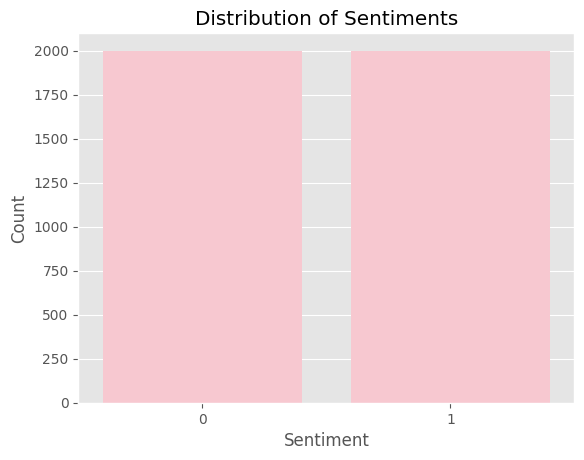

In [19]:

sns.countplot(x='sentiment', data=df,color='pink')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()


**Wordcloud Genration**

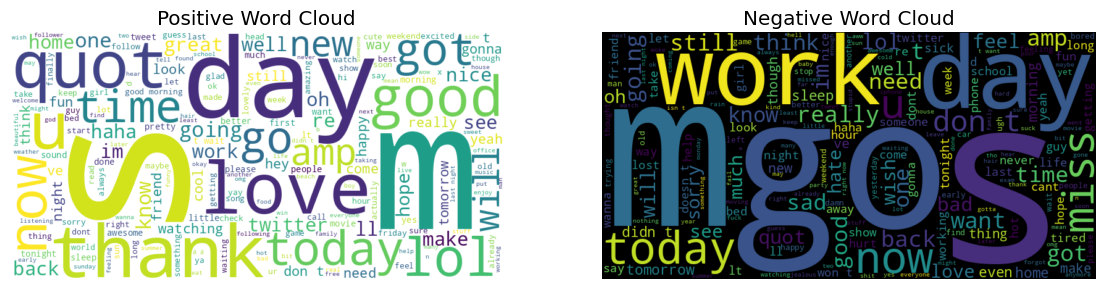

In [21]:
positive_text = ' '.join(df[df['sentiment'] == 1]['clean_text'])
negative_text = ' '.join(df[df['sentiment'] == 0]['clean_text'])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Plot word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Word Cloud')
plt.show()


#MODEL EVALUATION

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
# Train the model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = model.predict(X_test_vec)



Accuracy: 69.00%


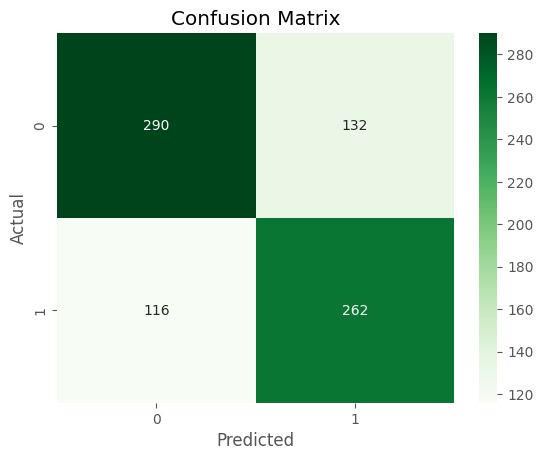

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       422
           1       0.66      0.69      0.68       378

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.69      0.69      0.69       800



In [33]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [40]:
# Function to predict sentiment of a new comment
def predict_sentiment(comment):
    # Clean the comment
    cleaned_comment = clean_text(comment)

    # Vectorize the comment
    vectorized_comment = vectorizer.transform([cleaned_comment])

    # Predict the sentiment
    prediction = model.predict(vectorized_comment)

    return prediction[0]

# Test the function
#input("enter the comment to analyse its sentiment:")
new_comment = input("Enter a new comment: ")
predicted_sentiment = predict_sentiment(new_comment)
if predicted_sentiment == 1:
    predicted_sentiment = "Positive"
elif predicted_sentiment == 0:
    predicted_sentiment = "Negative"
else:
    predicted_sentiment = "Neutral"
print(f"The sentiment of the comment '{new_comment}' is {predicted_sentiment}.")


Enter a new comment: LOOKS GOOD ON YOU 
The sentiment of the comment 'LOOKS GOOD ON YOU ' is Positive.
